#### 3. Design a statistical model to analyze wine quality using Gaussian distribution methods. Utilize synthetic data generated with NumPy or the Wine Quality Dataset 

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, kstest
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score, classification_report

In [31]:
from sklearn.datasets import fetch_openml

data = fetch_openml(name='wine-quality-red', version=1, as_frame=True)
df = data.frame

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed_acidity         1599 non-null   float64 
 1   volatile_acidity      1599 non-null   float64 
 2   citric_acid           1599 non-null   float64 
 3   residual_sugar        1599 non-null   float64 
 4   chlorides             1599 non-null   float64 
 5   free_sulfur_dioxide   1599 non-null   float64 
 6   total_sulfur_dioxide  1599 non-null   float64 
 7   density               1599 non-null   float64 
 8   pH                    1599 non-null   float64 
 9   sulphates             1599 non-null   float64 
 10  alcohol               1599 non-null   float64 
 11  class                 1599 non-null   category
dtypes: category(1), float64(11)
memory usage: 139.3 KB


In [33]:
df['class'] = df['class'].astype('int64')

In [34]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,class
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [35]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<Figure size 1200x1000 with 0 Axes>

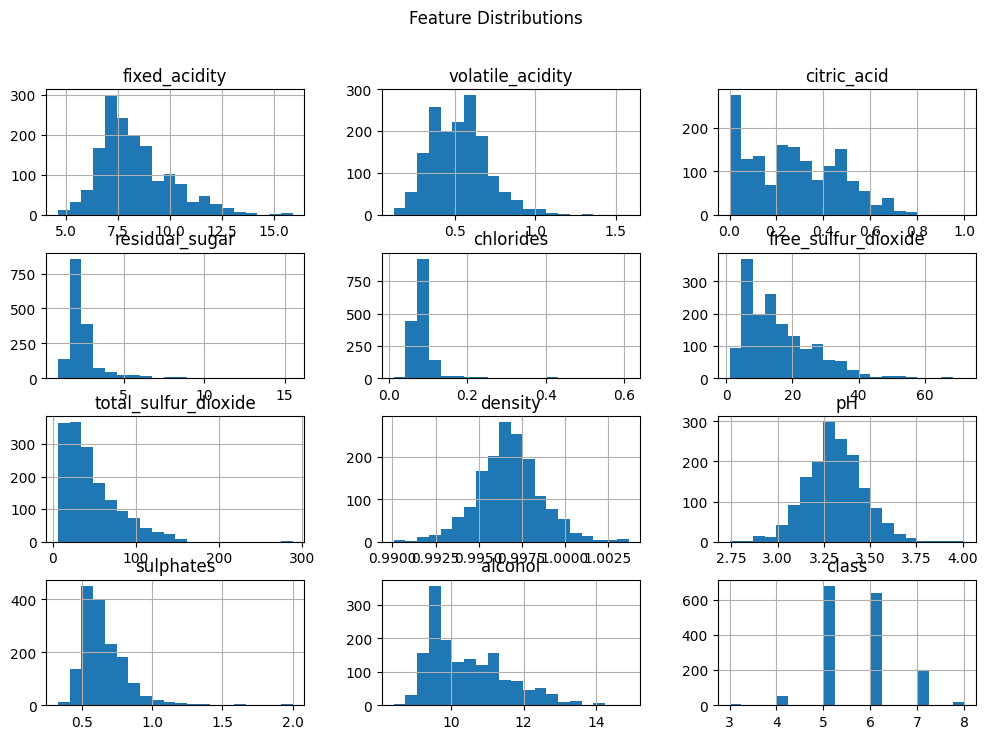

In [36]:
plt.figure(figsize=(12, 10))
df.hist(bins=20, figsize=(12, 8))
plt.suptitle("Feature Distributions")
plt.show()

In [52]:
from sklearn.preprocessing import StandardScaler

X = df.drop('class', axis=1)


scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=df.columns.drop('class'))

y = df['class']
y = y.apply(lambda x: 1 if x>=6 else 0)

In [ ]:
#OPTIONAL
stats = X.agg(['mean', 'std'])
print(stats)

      fixed_acidity  volatile_acidity  ...     sulphates       alcohol
mean   3.554936e-16      1.733031e-16  ...  6.754377e-16  1.066481e-16
std    1.000313e+00      1.000313e+00  ...  1.000313e+00  1.000313e+00

[2 rows x 11 columns]


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

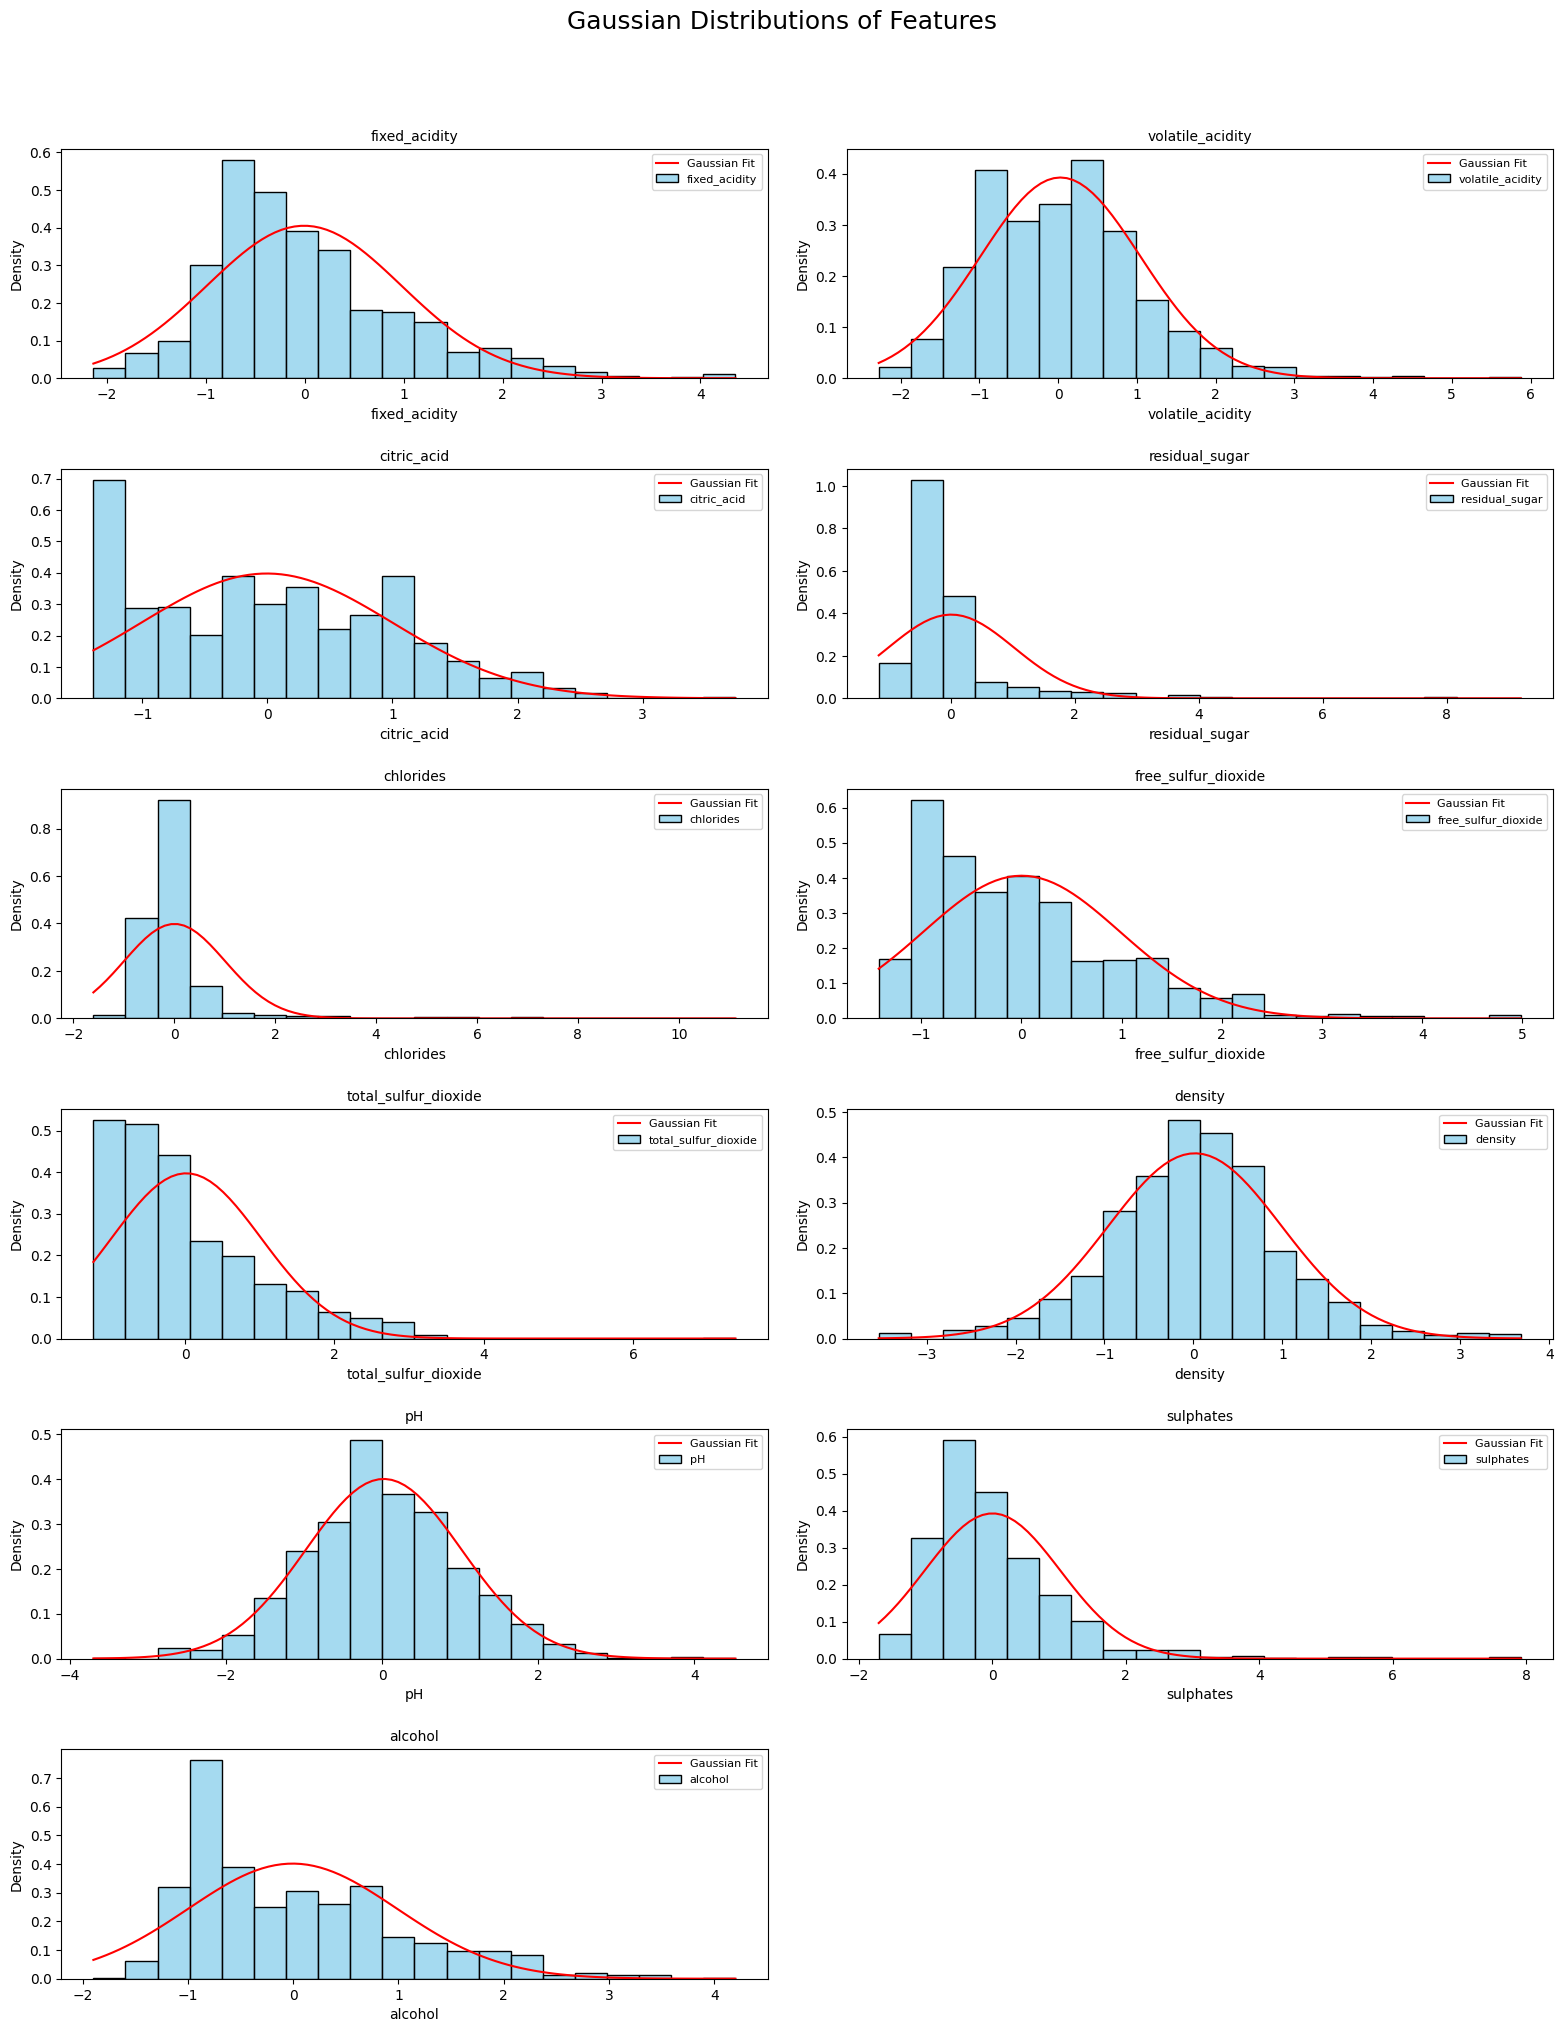

In [40]:
features = [col for col in df.columns if col != 'class']

plt.figure(figsize=(16, 20))
for i, feature in enumerate(features):
    plt.subplot((len(features)+1)//2, 2, i+1)
    mean, std = X_train[feature].mean(), X_train[feature].std()
    x = np.linspace(X_train[feature].min(), X_train[feature].max(), 100)
    pdf = norm.pdf(x, mean, std)
    sns.histplot(X_train[feature], kde=False, bins=20, stat='density', label=feature, color="skyblue", edgecolor="black")
    plt.plot(x, pdf, color='red', label="Gaussian Fit")
    plt.title(f"{feature}", fontsize=10)
    plt.legend(fontsize=8)
    
plt.suptitle("Gaussian Distributions of Features", fontsize=18, y=1.02)
plt.tight_layout(pad=2)
plt.show()

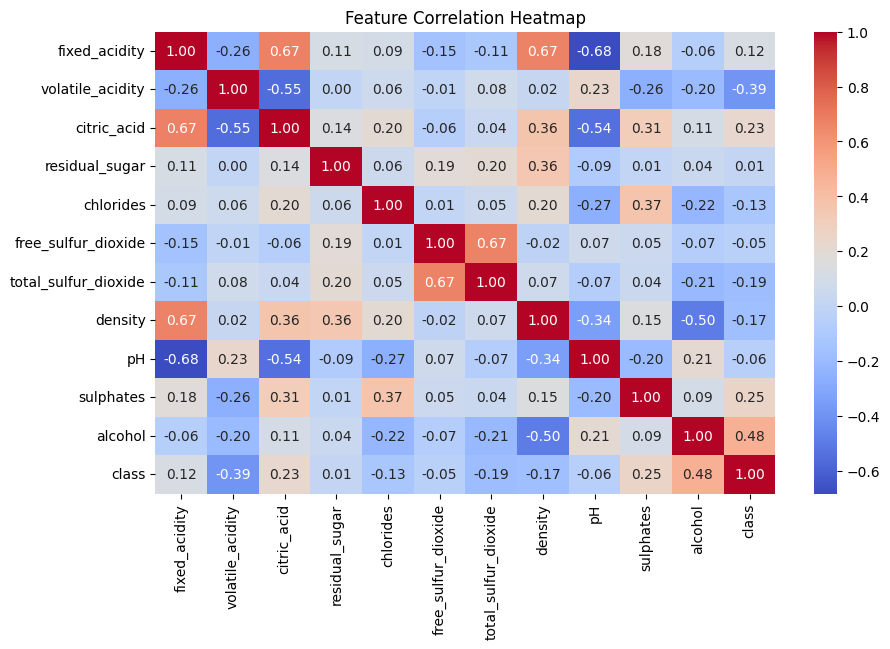

In [41]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

In [42]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

In [43]:
print("Naive Bayes Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))

Naive Bayes Accuracy:  0.7416666666666667
Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.69      0.70       213
           1       0.76      0.78      0.77       267

    accuracy                           0.74       480
   macro avg       0.74      0.74      0.74       480
weighted avg       0.74      0.74      0.74       480



In [49]:
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(X_train)
gmm_labels = gmm.predict(X_test)
# gmm_probs = gmm.predict_proba(X_test)
# gmm_labels = (gmm_probs[:, 1] > 0.5).astype(int)
print("GMM Accuracy: ", accuracy_score(y_test, gmm_labels))
print("Classification Report: ", classification_report(y_test, gmm_labels))

GMM Accuracy:  0.4354166666666667
Classification Report:                precision    recall  f1-score   support

           0       0.43      0.80      0.56       213
           1       0.47      0.14      0.22       267

    accuracy                           0.44       480
   macro avg       0.45      0.47      0.39       480
weighted avg       0.45      0.44      0.37       480



In [ ]:
#OPTIONAL
for feature in features:
    ks_stat, p_value = kstest(X[feature], 'norm', args=(X[feature].mean(), X[feature].std()))
    print(f'KS test for {feature}: Statistics={ks_stat:.4f}, P-value={p_value:.4f}')

KS test for fixed_acidity: Statistics=0.1105, P-value=0.0000
KS test for volatile_acidity: Statistics=0.0547, P-value=0.0001
KS test for citric_acid: Statistics=0.0839, P-value=0.0000
KS test for residual_sugar: Statistics=0.2607, P-value=0.0000
KS test for chlorides: Statistics=0.2596, P-value=0.0000
KS test for free_sulfur_dioxide: Statistics=0.1112, P-value=0.0000
KS test for total_sulfur_dioxide: Statistics=0.1210, P-value=0.0000
KS test for density: Statistics=0.0448, P-value=0.0032
KS test for pH: Statistics=0.0404, P-value=0.0106
KS test for sulphates: Statistics=0.1248, P-value=0.0000
KS test for alcohol: Statistics=0.1215, P-value=0.0000
